In [17]:
import plotly as plt

In [18]:
!pip install mysql-connector-python

In [19]:
import mysql.connector
import pandas as pd

In [20]:
db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="eilat123",
        database="hrdb",
        use_pure=True
    )

mycursor = db.cursor()
print("Connection successful")

Connection successful


In [21]:
def sql_script(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    column_names = [i[0] for i in mycursor.description]
    df_selected = pd.DataFrame(result, columns=column_names)

    return df_selected

In [22]:
# The original line is invalid Python syntax. If you want to use the sql_script function to run a specific SQL query, you should call it like this:
df_selected = sql_script("SELECT attrition, BusinessTravel, Department, Gender, JobRole, MaritalStatus, MonthlyIncome, YearsInCurrentRole, YearsSinceLastPromotion, WorkLifeBalance FROM hrdb_new;")

In [23]:
df_selected

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,MonthlyIncome,YearsInCurrentRole,YearsSinceLastPromotion,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,Female,Sales Executive,Single,5993,4,0,1
1,No,Travel_Frequently,Research & Development,Male,Research Scientist,Married,5130,7,1,3
2,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,2090,0,0,3
3,No,Travel_Frequently,Research & Development,Female,Research Scientist,Married,2909,7,3,3
4,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,Married,3468,2,2,3
...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Male,Laboratory Technician,Married,2571,2,0,3
1466,No,Travel_Rarely,Research & Development,Male,Healthcare Representative,Married,9991,7,1,3
1467,No,Travel_Rarely,Research & Development,Male,Manufacturing Director,Married,6142,2,0,3
1468,No,Travel_Frequently,Sales,Male,Sales Executive,Married,5390,6,0,2


In [24]:
df_selected.to_csv('exported_df.csv', index=False)

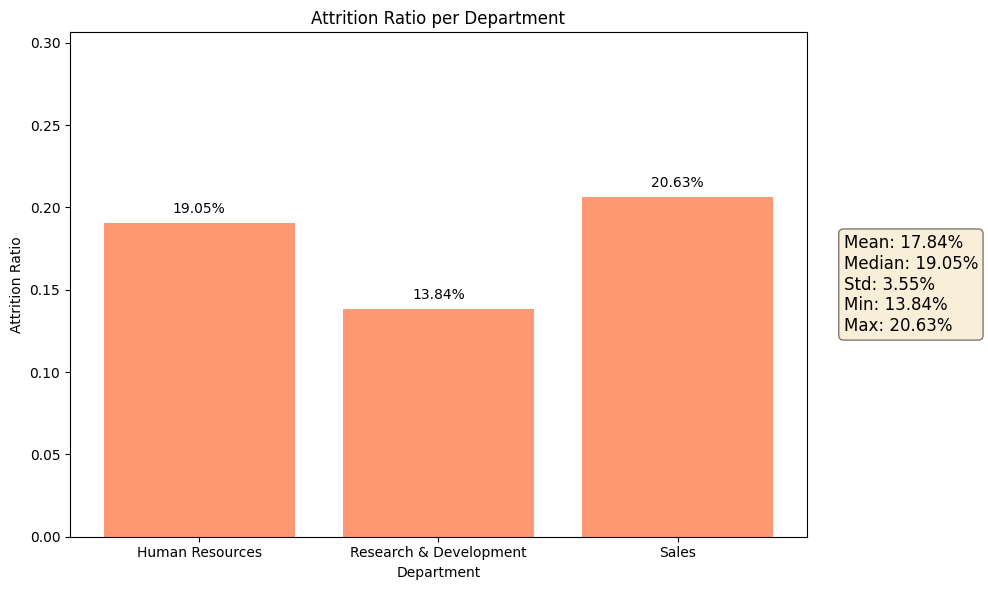

In [25]:
import matplotlib.pyplot as plt

# Calculate attrition ratio per department
attrition_counts = df_selected[df_selected['Attrition'] == 'Yes']['Department'].value_counts().sort_index()
total_counts = df_selected['Department'].value_counts().sort_index()
attrition_ratio = (attrition_counts / total_counts).sort_index()

# Calculate statistical characteristics
mean_ratio = attrition_ratio.mean()
median_ratio = attrition_ratio.median()
std_ratio = attrition_ratio.std()
min_ratio = attrition_ratio.min()
max_ratio = attrition_ratio.max()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(attrition_ratio.index, attrition_ratio.values, color='coral', alpha=0.8)
plt.title('Attrition Ratio per Department')
plt.xlabel('Department')
plt.ylabel('Attrition Ratio')
plt.ylim(0, max_ratio + 0.1)

# Annotate bars with ratio values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

# Add statistical characteristics as text box
stat_text = (
    f"Mean: {mean_ratio:.2%}\n"
    f"Median: {median_ratio:.2%}\n"
    f"Std: {std_ratio:.2%}\n"
    f"Min: {min_ratio:.2%}\n"
    f"Max: {max_ratio:.2%}"
)
plt.gca().text(1.05, 0.5, stat_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.tight_layout()
plt.show()


 **Figure Legend: Attrition Ratio per Department**

This bar chart illustrates the attrition ratio (percentage of employees who left) across three departments:

* Sales shows the highest attrition ratio at 20.63%, suggesting a potential retention issue.

* Human Resources follows with a 19.05% attrition rate.

* Research & Development has the lowest attrition ratio at 13.84%, indicating relatively higher employee retention.

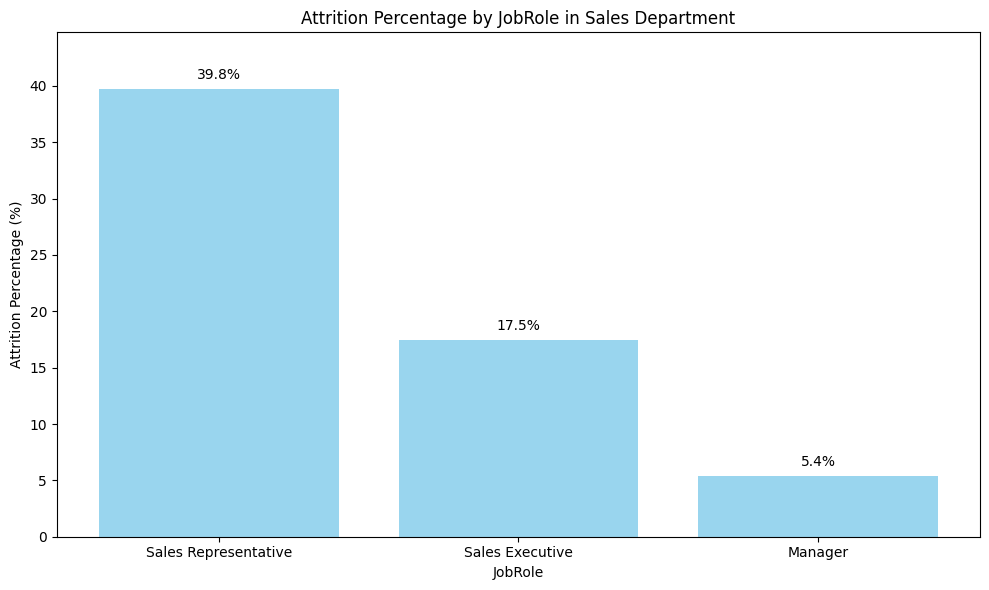

In [26]:
# Filter for Sales department
sales_df = df_selected[df_selected['Department'] == 'Sales']

# Calculate attrition percentage per JobRole in Sales
jobrole_counts = sales_df['JobRole'].value_counts()
jobrole_attrition = sales_df[sales_df['Attrition'] == 'Yes']['JobRole'].value_counts()
attrition_percentage = (jobrole_attrition / jobrole_counts * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(attrition_percentage.index, attrition_percentage.values, color='skyblue', alpha=0.85)
plt.title('Attrition Percentage by JobRole in Sales Department')
plt.xlabel('JobRole')
plt.ylabel('Attrition Percentage (%)')
plt.ylim(0, attrition_percentage.max() + 5)

# Annotate bars with percentage values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


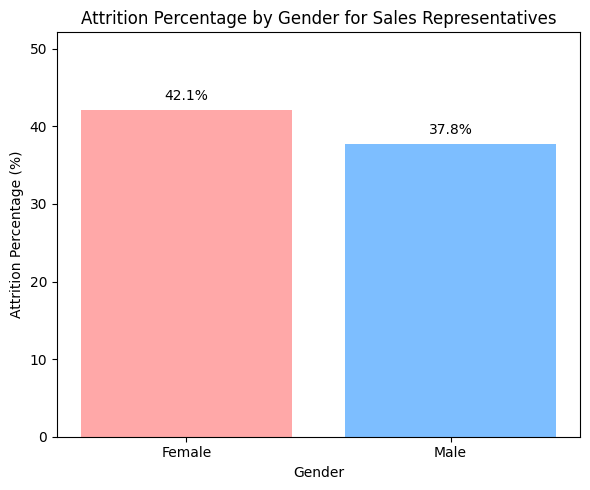

In [27]:
# Filter for Sales Representative role
sales_rep_df = df_selected[df_selected['JobRole'] == 'Sales Representative']

# Calculate attrition percentage by Gender
gender_counts = sales_rep_df['Gender'].value_counts()
gender_attrition = sales_rep_df[sales_rep_df['Attrition'] == 'Yes']['Gender'].value_counts()
gender_attrition_percentage = (gender_attrition / gender_counts * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(gender_attrition_percentage.index, gender_attrition_percentage.values, color=['#ff9999','#66b3ff'], alpha=0.85)
plt.title('Attrition Percentage by Gender for Sales Representatives')
plt.xlabel('Gender')
plt.ylabel('Attrition Percentage (%)')
plt.ylim(0, gender_attrition_percentage.max() + 10)

# Annotate bars with percentage values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


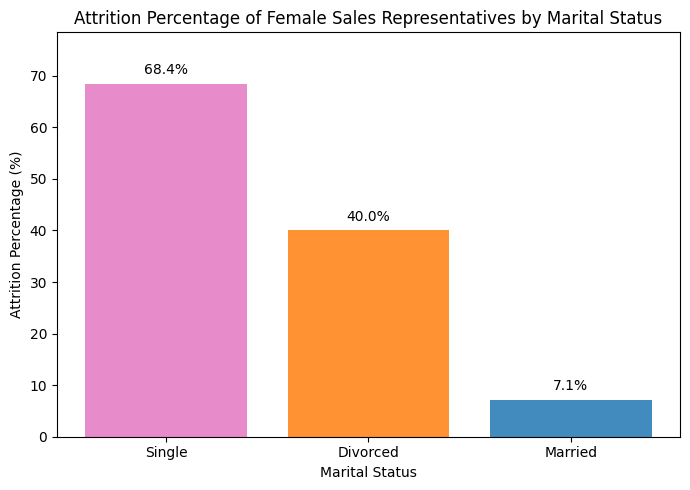

In [28]:
# Filter for Sales Representative role and Female gender
female_sales_rep_df = df_selected[(df_selected['JobRole'] == 'Sales Representative') & (df_selected['Gender'] == 'Female')]

# Calculate total number of female sales reps per MaritalStatus
female_sales_rep_counts = female_sales_rep_df['MaritalStatus'].value_counts()

# Calculate number of female sales reps with Attrition = 'Yes' per MaritalStatus
female_sales_rep_attrition_yes = female_sales_rep_df[female_sales_rep_df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()

# Calculate the ratio (percentage) of female sales reps with Attrition = 'Yes' per MaritalStatus
female_sales_rep_attrition_ratio = (female_sales_rep_attrition_yes / female_sales_rep_counts * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(7,5))
bars = plt.bar(female_sales_rep_attrition_ratio.index, female_sales_rep_attrition_ratio.values, color=['#e377c2', '#ff7f0e', '#1f77b4'], alpha=0.85)
plt.title('Attrition Percentage of Female Sales Representatives by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Percentage (%)')
plt.ylim(0, female_sales_rep_attrition_ratio.max() + 10)

# Annotate bars with percentage values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


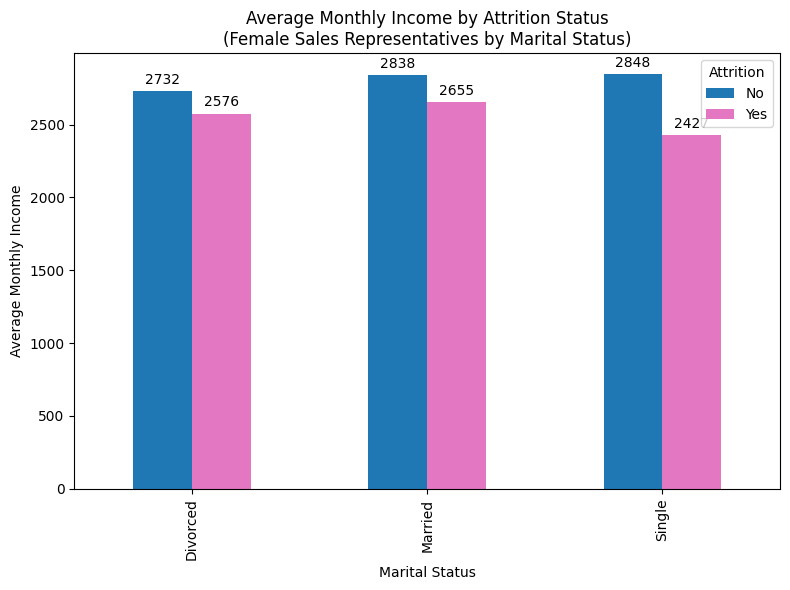

In [29]:
# Visualize average monthly income by attrition status for female Sales Representatives in each Marital Status
# Filter for female Sales Representatives
female_sales_rep_df = df_selected[(df_selected['JobRole'] == 'Sales Representative') & (df_selected['Gender'] == 'Female')]

# Group by MaritalStatus and Attrition, then calculate average MonthlyIncome
avg_income_by_attrition = (
    female_sales_rep_df
    .groupby(['MaritalStatus', 'Attrition'])['MonthlyIncome']
    .mean()
    .reset_index()
)

# Pivot for easier plotting
avg_income_pivot = avg_income_by_attrition.pivot(index='MaritalStatus', columns='Attrition', values='MonthlyIncome')

# Plot
ax = avg_income_pivot.plot(kind='bar', figsize=(8,6), color=['#1f77b4', '#e377c2'])
plt.title('Average Monthly Income by Attrition Status\n(Female Sales Representatives by Marital Status)')
plt.xlabel('Marital Status')
plt.ylabel('Average Monthly Income')
plt.legend(title='Attrition')
plt.tight_layout()

# Annotate each bar with the mean value
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', 
                    fontsize=10, 
                    xytext=(0, 3), 
                    textcoords='offset points')

plt.show()




C:\Users\inbal\AppData\Local\Temp\ipykernel_22788\3310124830.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=female_sales_rep_df, x='MaritalStatus', y='MonthlyIncome', palette='pastel')


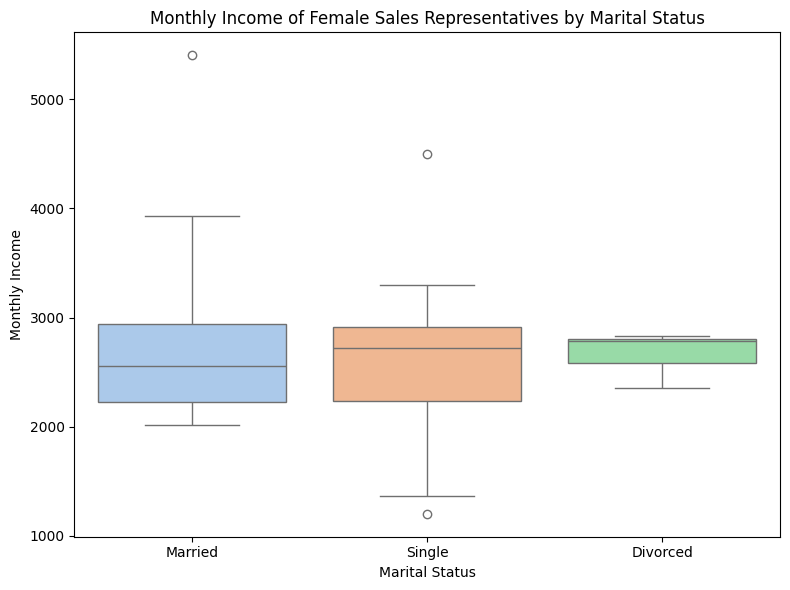

In [30]:
# Visualize the monthly income among female Sales Representatives by Marital Status

# Filter for female Sales Representatives
female_sales_rep_df = df_selected[(df_selected['JobRole'] == 'Sales Representative') & (df_selected['Gender'] == 'Female')]
import seaborn as sns

# Create a boxplot of MonthlyIncome by MaritalStatus
plt.figure(figsize=(8,6))
sns.boxplot(data=female_sales_rep_df, x='MaritalStatus', y='MonthlyIncome', palette='pastel')
plt.title('Monthly Income of Female Sales Representatives by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()


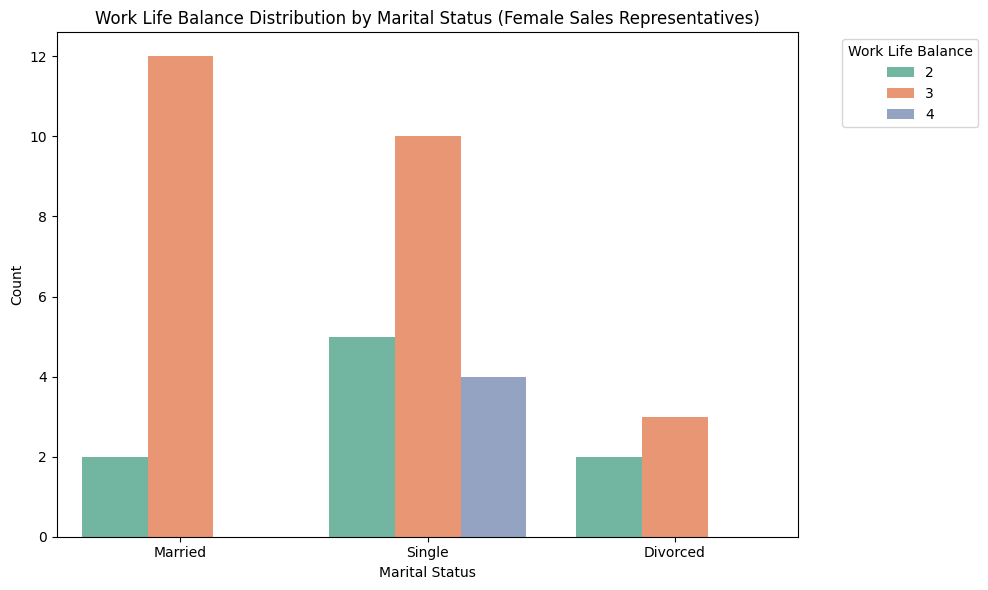

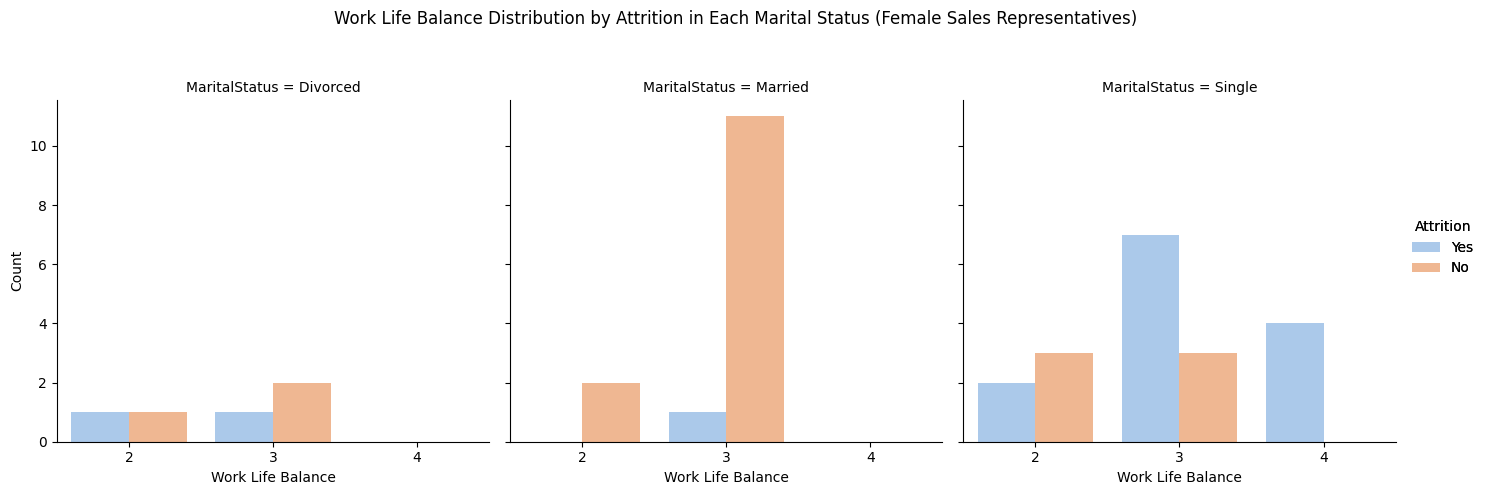

In [31]:


# Filter for female Sales Representatives (if not already filtered)
female_sales_rep_df = df_selected[(df_selected['JobRole'] == 'Sales Representative') & (df_selected['Gender'] == 'Female')]

plt.figure(figsize=(10,6))
sns.countplot(
    data=female_sales_rep_df,
    x='MaritalStatus',
    hue='WorkLifeBalance',
    palette='Set2',
    hue_order=sorted(female_sales_rep_df['WorkLifeBalance'].unique()),
    dodge=True
)
plt.title('Work Life Balance Distribution by Marital Status (Female Sales Representatives)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Work Life Balance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Now, show the distribution by Attrition within each Marital Status
g = sns.catplot(
    data=female_sales_rep_df,
    x='WorkLifeBalance',
    hue='Attrition',
    col='MaritalStatus',
    kind='count',
    palette='pastel',
    col_order=sorted(female_sales_rep_df['MaritalStatus'].unique()),
    height=5,
    aspect=0.9
)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Work Life Balance Distribution by Attrition in Each Marital Status (Female Sales Representatives)')
g.set_axis_labels('Work Life Balance', 'Count')
g.add_legend(title='Attrition')
plt.show()


C:\Users\inbal\AppData\Local\Temp\ipykernel_22788\41847519.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


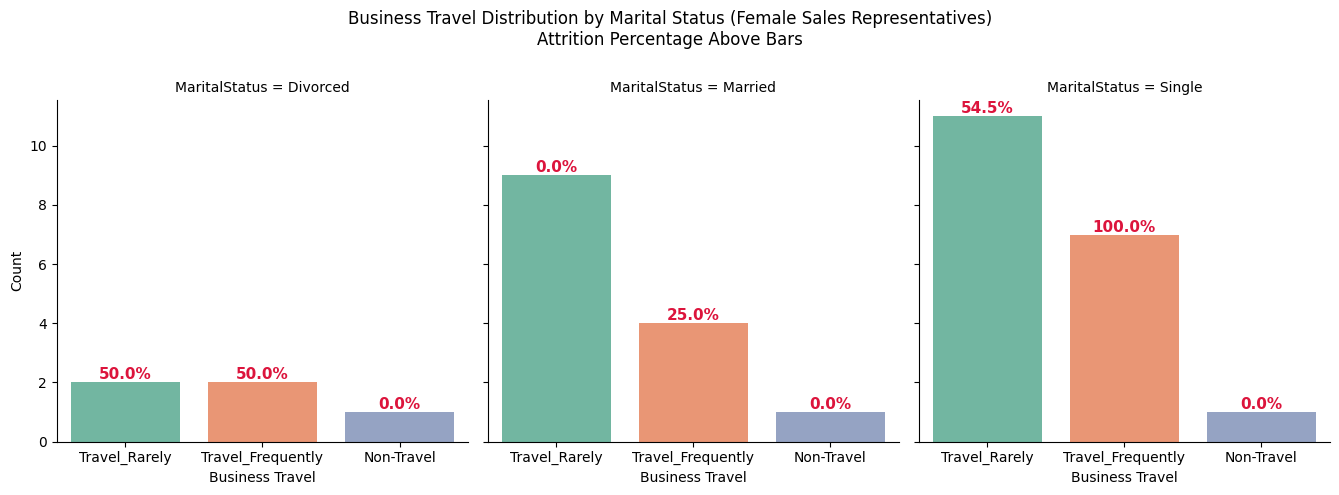

In [32]:
# Show the BusinessTravel distribution for female Sales Representatives, with attrition percentage above the bars, split by MaritalStatus

# Filter for female Sales Representatives (already filtered above, but ensure it's available)
female_sales_rep_df = df_selected[(df_selected['JobRole'] == 'Sales Representative') & (df_selected['Gender'] == 'Female')]

# Calculate attrition percentage per BusinessTravel within each MaritalStatus
bt_attrition = (
    female_sales_rep_df.groupby(['MaritalStatus', 'BusinessTravel'])['Attrition']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)
# Only keep 'Yes' attrition percentage
if 'Yes' in bt_attrition.columns:
    bt_attrition['AttritionPercent'] = bt_attrition['Yes'] * 100
else:
    bt_attrition['AttritionPercent'] = 0

# Merge average and attrition percent for plotting/annotation
# Calculate average count per BusinessTravel within each MaritalStatus for plotting
bt_avg = (
    female_sales_rep_df.groupby(['MaritalStatus', 'BusinessTravel'])
    .size()
    .reset_index(name='Count')
)
bt_plot = bt_avg.merge(
    bt_attrition[['MaritalStatus', 'BusinessTravel', 'AttritionPercent']],
    on=['MaritalStatus', 'BusinessTravel'],
    how='left'
)

# Only keep 'Yes' attrition percentage
if 'Yes' in bt_attrition.columns:
    bt_attrition['AttritionPercent'] = bt_attrition['Yes'] * 100
else:
    bt_attrition['AttritionPercent'] = 0

# Plot
g = sns.catplot(
    data=female_sales_rep_df,
    x='BusinessTravel',
    kind='count',
    col='MaritalStatus',
    col_order=sorted(female_sales_rep_df['MaritalStatus'].unique()),
    palette='Set2',
    height=5,
    aspect=0.9
)

# Annotate attrition percentage above each bar
for ax, marital_status in zip(g.axes.flat, g.col_names):
    for p in ax.patches:
        # Get the label for this bar
        business_travel = p.get_x() + p.get_width() / 2
        label = ax.get_xticklabels()[int(p.get_x() + p.get_width()/2)].get_text()
        # Find attrition percent for this marital status and business travel
        percent = bt_attrition.loc[
            (bt_attrition['MaritalStatus'] == marital_status) & 
            (bt_attrition['BusinessTravel'] == label), 
            'AttritionPercent'
        ]
        if not percent.empty:
            percent_val = percent.values[0]
            ax.annotate(f"{percent_val:.1f}%", 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=11, fontweight='bold', color='crimson')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Business Travel Distribution by Marital Status (Female Sales Representatives)\nAttrition Percentage Above Bars')
g.set_axis_labels('Business Travel', 'Count')
plt.show()


C:\Users\inbal\AppData\Local\Temp\ipykernel_22788\1611608941.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


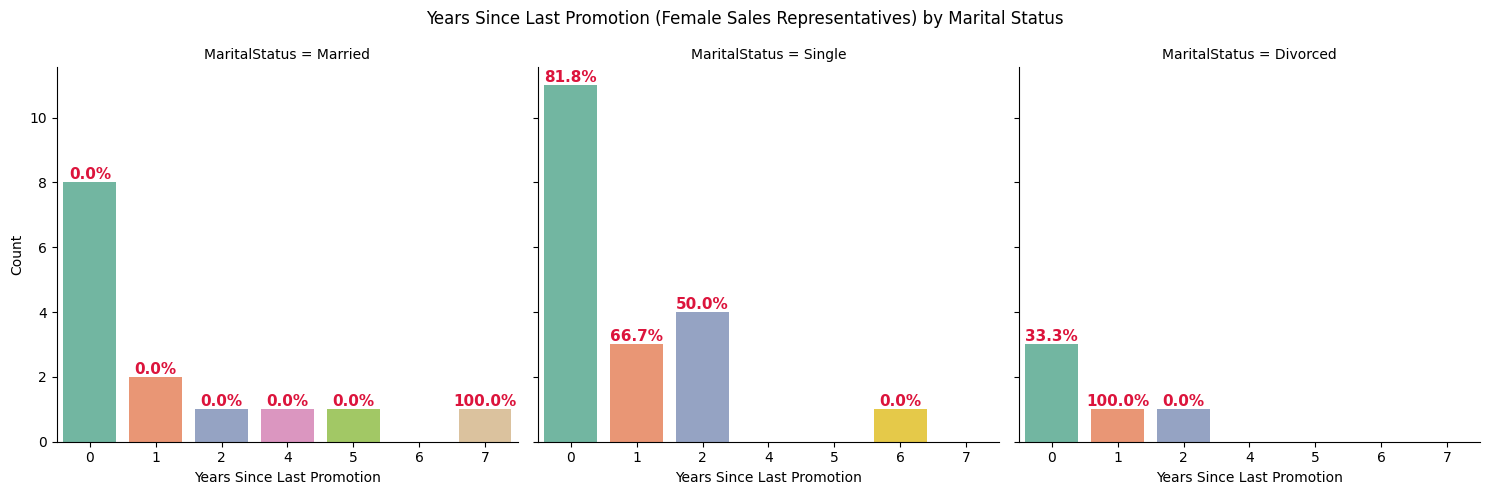

In [33]:
# Show the distribution of YearsSinceLastPromotion among female Sales Representatives, split by MaritalStatus, with attrition percentage above the bars

# We'll use a FacetGrid to show the distribution for each MaritalStatus

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate attrition percentage per YearsSinceLastPromotion and MaritalStatus
promotion_attrition_ms = (
    female_sales_rep_df.groupby(['MaritalStatus', 'YearsSinceLastPromotion'])['Attrition']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)
if 'Yes' in promotion_attrition_ms.columns:
    promotion_attrition_ms['AttritionPercent'] = promotion_attrition_ms['Yes'] * 100
else:
    promotion_attrition_ms['AttritionPercent'] = 0

g = sns.catplot(
    data=female_sales_rep_df,
    x='YearsSinceLastPromotion',
    kind='count',
    col='MaritalStatus',
    order=sorted(female_sales_rep_df['YearsSinceLastPromotion'].unique()),
    palette='Set2',
    col_wrap=3,
    height=5,
    aspect=1
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Years Since Last Promotion (Female Sales Representatives) by Marital Status')

# Annotate attrition percentage above each bar in each facet
for ax in g.axes.flatten():
    marital_status = ax.get_title().split(' = ')[-1]
    for p in ax.patches:
        # Get the label for this bar
        x_val = p.get_x() + p.get_width() / 2
        try:
            label = int(ax.get_xticklabels()[int(round(x_val))].get_text())
        except:
            continue
        percent = promotion_attrition_ms.loc[
            (promotion_attrition_ms['MaritalStatus'] == marital_status) &
            (promotion_attrition_ms['YearsSinceLastPromotion'] == label),
            'AttritionPercent'
        ]
        if not percent.empty:
            percent_val = percent.values[0]
            ax.annotate(f"{percent_val:.1f}%",
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=11, fontweight='bold', color='crimson')
g.set_axis_labels('Years Since Last Promotion', 'Count')
plt.tight_layout()
plt.show()



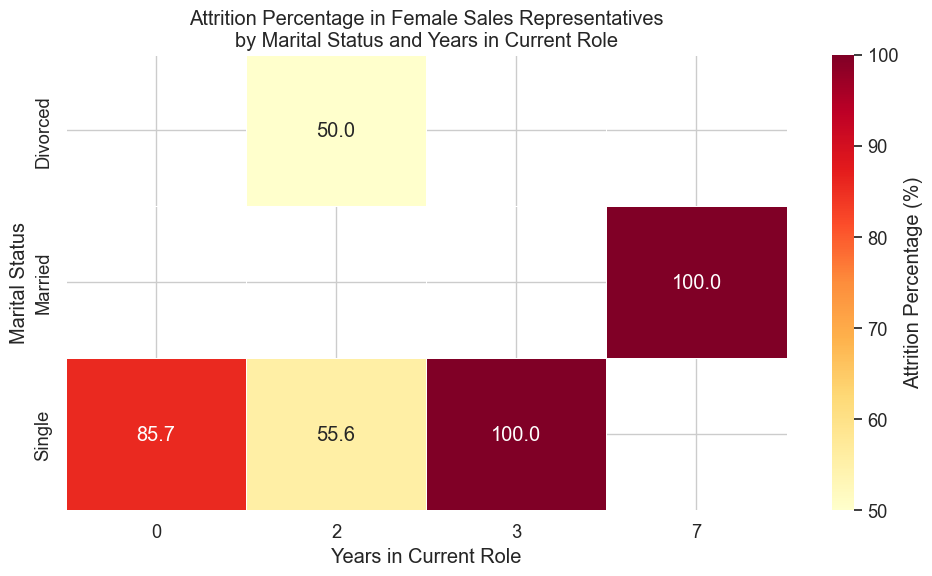

In [34]:
# Create a pivot table for heatmap: rows=MaritalStatus, columns=YearsInCurrentRole, values=AttritionPercent
# Fill blank spots with 0.0
# First, create the role_attrition_ms DataFrame if it doesn't exist
# This DataFrame should contain the attrition percentage by MaritalStatus and YearsInCurrentRole
role_attrition_ms = (
    female_sales_rep_df.groupby(['MaritalStatus', 'YearsInCurrentRole'])['Attrition']
    .value_counts(normalize=True)
    .rename('AttritionPercent')
    .reset_index()
    .query("Attrition == 'Yes'")
)
role_attrition_ms['AttritionPercent'] *= 100

heatmap_data = role_attrition_ms.pivot(
    index='MaritalStatus',
    columns='YearsInCurrentRole',
    values='AttritionPercent'
).fillna(0.0)
heatmap_data = role_attrition_ms.pivot(
    index='MaritalStatus',
    columns='YearsInCurrentRole',
    values='AttritionPercent'
)
# Clean up the heatmap data: sort index and columns for better readability
heatmap_data = heatmap_data.sort_index()
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

# Set a more visually appealing style
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': 'Attrition Percentage (%)'}
)
plt.title('Attrition Percentage in Female Sales Representatives\nby Marital Status and Years in Current Role')
plt.xlabel('Years in Current Role')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()
